# Import required libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load updated csv file afer EDA

In [174]:
df=pd.read_csv('healthcare_stroke_data_updated.csv')

In [175]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.123214,1,0.816895,0,1,1,1,0.927289,0.626190,1.0,0,0,1,0,0,0,1,0,0
1,0.708205,0,0.743652,0,0,1,0,0.785821,0.442619,1.0,0,0,0,1,0,0,0,1,0
2,0.426015,1,0.975586,0,1,1,0,0.271397,0.528571,1.0,0,0,1,0,0,0,0,1,0
3,0.824928,0,0.597168,0,0,1,1,0.620312,0.573810,1.0,0,0,1,0,0,0,0,0,1
4,0.021929,0,0.963379,1,0,1,0,0.635752,0.326190,1.0,0,0,0,1,0,0,0,1,0


In [176]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [177]:
#move target variable to the end of the dataframe
column_to_move=df.pop("stroke")

df.insert(18, "stroke", column_to_move)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.123214,1,0.816895,0,1,1,1,0.927289,0.626190,0,0,1,0,0,0,1,0,0,1.0
1,0.708205,0,0.743652,0,0,1,0,0.785821,0.442619,0,0,0,1,0,0,0,1,0,1.0
2,0.426015,1,0.975586,0,1,1,0,0.271397,0.528571,0,0,1,0,0,0,0,1,0,1.0
3,0.824928,0,0.597168,0,0,1,1,0.620312,0.573810,0,0,1,0,0,0,0,0,1,1.0
4,0.021929,0,0.963379,1,0,1,0,0.635752,0.326190,0,0,0,1,0,0,0,1,0,1.0


## Selecting Important features

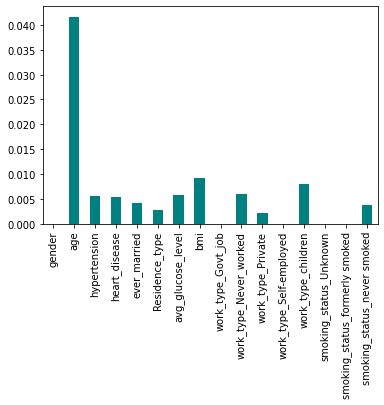

In [178]:
# Using filter methods: Information gain to know the importance of each feature w.r.t the target variable stroke and perform feature selection
from sklearn.feature_selection import mutual_info_classif

X=df.iloc[:,1:len(df.columns)-2]
y=df['stroke']

importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances,df.columns[1:len(df.columns)-2])
feat_imp.plot(kind='bar',color='teal')
plt.show()

In [179]:
# Thus, we can see features with maximum info gain are:
# Age, ever_married, bmi, heart_disease, hypertension,avg_glucose_level 
# Thus, we can select them as important features
column_to_move=df.pop("Residence_type")

df.insert(8, "Residence_type", column_to_move)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,Residence_type,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.123214,1,0.816895,0,1,1,0.927289,0.626190,1,0,0,1,0,0,0,1,0,0,1.0
1,0.708205,0,0.743652,0,0,1,0.785821,0.442619,0,0,0,0,1,0,0,0,1,0,1.0
2,0.426015,1,0.975586,0,1,1,0.271397,0.528571,0,0,0,1,0,0,0,0,1,0,1.0
3,0.824928,0,0.597168,0,0,1,0.620312,0.573810,1,0,0,1,0,0,0,0,0,1,1.0
4,0.021929,0,0.963379,1,0,1,0.635752,0.326190,0,0,0,0,1,0,0,0,1,0,1.0


## Create new dataframe having important features and target variable

In [180]:
selected_feat=['age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi']
df_new=df.iloc[:,2:8]
df_new.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
0,0.816895,0,1,1,0.927289,0.626190
1,0.743652,0,0,1,0.785821,0.442619
2,0.975586,0,1,1,0.271397,0.528571
3,0.597168,0,0,1,0.620312,0.573810
4,0.963379,1,0,1,0.635752,0.326190


In [181]:
#move target variable to the end of the dataframe
column_to_move=df.pop("stroke")

df_new.insert(6, "stroke", column_to_move)
df_new.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0.816895,0,1,1,0.927289,0.626190,1.0
1,0.743652,0,0,1,0.785821,0.442619,1.0
2,0.975586,0,1,1,0.271397,0.528571,1.0
3,0.597168,0,0,1,0.620312,0.573810,1.0
4,0.963379,1,0,1,0.635752,0.326190,1.0


## Split the data

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X=df_new.drop('stroke',axis=1)
y=df_new['stroke']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [187]:
print(X_train)

           age  hypertension  heart_disease  ever_married  avg_glucose_level  \
3375  0.597168             1              0             1           0.198419   
4804  0.731445             0              0             1           0.157175   
2118  0.218750             0              0             0           0.349717   
4441  0.768066             0              0             1           0.794690   
1146  0.755859             0              0             1           0.146650   
...        ...           ...            ...           ...                ...   
4426  0.682617             0              0             1           0.476600   
466   0.377441             0              0             1           0.234373   
3092  0.291992             0              0             1           0.099690   
3772  0.572754             0              0             1           0.548403   
860   0.719238             1              0             1           0.234747   

           bmi  
3375  0.542857  
4804 

In [188]:
print(y_train)

3375    0.0
4804    0.0
2118    0.0
4441    0.0
1146    0.0
       ... 
4426    0.0
466     0.0
3092    0.0
3772    0.0
860     0.0
Name: stroke, Length: 3502, dtype: float64


In [191]:
print(X_test.shape)

(1502, 6)


In [192]:
print(y_test.shape)

(1502,)


## Train Model

In [193]:
from sklearn.linear_model import LogisticRegression

logisticRegr=LogisticRegression()

logisticRegr.fit(X_train,y_train)


LogisticRegression()

## Test the model

In [194]:
predictions=logisticRegr.predict(X_test)

## Evaluate the model

In [197]:
score = logisticRegr.score(X_test, y_test)
print(round(score,2))

0.94


In [196]:
from sklearn import metrics
conf_matrix= metrics.confusion_matrix(y_test, predictions)
print(conf_matrix)

[[1418    0]
 [  84    0]]


In [198]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1418
           1       0.00      0.00      0.00        84

    accuracy                           0.94      1502
   macro avg       0.47      0.50      0.49      1502
weighted avg       0.89      0.94      0.92      1502



C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

## Save model to pickle file

In [199]:
import pickle

with open('LR_model_pkl', 'wb') as files:
    pickle.dump(logisticRegr, files)
    
# a file named LR_model_pkl is created in the current directory